# Code your own neuron and neural net
The parts of code that look like
```python
pass  # ⬅️✏️
```
need to be filled in before moving to the next cell.

Check out the slides and / or corresponding video lecture for more instructions.

In [1]:
# Define two vectors (lists): input my_x, weights my_w
my_x = [0, 1, 1]
my_w = [-10, 10, 5]

In [2]:
# Multiply two lists element wise
def mul(a, b):
    """
    return a list c, same length as a, element c[i] = a[i] * b[i]
    "len(list)" and "[0] * n" may be useful
    """
    pass  # ⬅️✏️
    return [a[i]*b[i] for i in range(len(a))]

---

In [3]:
# Test mul() function
mul(my_x, my_w)

[0, 10, 5]

In [4]:
# Define a scalar: bias b
my_b = -5

In [5]:
# Neuron linear (internal) potential
def linear_neuron(x, weights, bias):
    """
    return a scalar value representing a scalar neuron
    "sum(list)" computes the sum of the elements in a list
    """
    pass  # ⬅️✏️
    return sum(mul(x,weights))+bias

---

In [6]:
# Test linear_neuron() function
linear_neuron(my_x, my_w, my_b)

10

In [7]:
# Import exp() function (safe on lists)
from numpy import exp

In [8]:
# Logistic sigmoid
def sigmoid(z):
    """
    return the logistic sigmoid (use exp())
    """
    pass  # ⬅️✏️
    return exp(z)

---

In [9]:
# Try out σ() for different z values
for z in (-5, 0, 5): print(sigmoid(z))

0.006737946999085467
1.0
148.4131591025766


In [10]:
# Import some plotting stuff to graph sigmoid()
from numpy import linspace
from matplotlib.pyplot import plot, axhline, axvline, grid, style
style.use('dark_background')

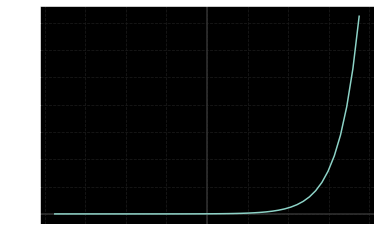

In [11]:
# Get a pair of axis and grid lines centred in (0, 0)
axhline(c='.2'); axvline(color='.2')
grid(c='.1', ls='--')

# Plot across a span of numbers
z = linspace(-7.5, 7.5)
plot(z, sigmoid(z));

In [12]:
# Full neuron function
def neuron(x, weights, bias):
    """
    Return a classical neuron output (reuse code above)
    """
    pass  # ⬅️✏️
    return sigmoid(sum(mul(x,weights))+bias)

---

In [13]:
# Test neuron() function
neuron(my_x, my_w, my_b)

22026.465794806718

In [14]:
# Package OR neuron weights and bias
def or_neuron(x):
    """
    Return x1 OR x2 (x1 + x2)
    """
    pass  # ⬅️✏️
#     return [sum(x[i]) for i in range(len(x))]
    return (sum(x))

---

In [15]:
# Defina a collection of inputs to test OR and AND
my_x_collection = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]

In [16]:
print('Checking OR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{or_neuron(my_x):.3f}')

Checking OR neuron output
[0, 0] 0.000
[0, 1] 1.000
[1, 0] 1.000
[1, 1] 2.000


In [17]:
# Package AND neuron weights and bias
def and_neuron(x):
    """
    Return x1 AND x2 (x1 * x2)
    """
    pass  # ⬅️✏️
    return x[0]*x[1]

---

In [18]:
print('Checking AND neuron output')
for my_x in my_x_collection:
    print(my_x, f'{and_neuron(my_x):.3f}')

Checking AND neuron output
[0, 0] 0.000
[0, 1] 0.000
[1, 0] 0.000
[1, 1] 1.000


In [19]:
# Package NOT neuron weight and bias
def not_neuron(x):
    """
    Return NOT x1 (x1_)
    """
    pass  # ⬅️✏️
    return (1-x)

---

In [20]:
print('Checking NOT neuron output')
for my_x in [0, 1]:
    print(my_x, f'{not_neuron(my_x):.3f}')

Checking NOT neuron output
0 1.000
1 0.000


![X-OR](res/x-or_circuit.png)

In [21]:
# Combine OR, AND, and NOT into a XOR neuron
def xor_neuron(x):
    """
    Return x1_ * x2 + x1 * x2_
    """
    pass  # ⬅️✏️
    return or_neuron([and_neuron([x[0],not_neuron(x[1])]),and_neuron([not_neuron(x[0]),x[1]])])

---

In [22]:
print('Checking XOR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{xor_neuron(my_x):.3f}')

Checking XOR neuron output
[0, 0] 0.000
[0, 1] 1.000
[1, 0] 1.000
[1, 1] 0.000


![Half-adder](res/half-adder_circuit.png)

In [23]:
# Combine a XOR and an AND into a half-adder
# ⬅️✏️
def half_adder(x):
    S = xor_neuron(x)
    C = and_neuron(x)
    return (C,S)

print('Checking half_adder neuron output')
for my_x in my_x_collection:
    print(my_x, f'{half_adder(my_x)}')

Checking half_adder neuron output
[0, 0] (0, 0)
[0, 1] (0, 1)
[1, 0] (0, 1)
[1, 1] (1, 0)


---

![Adder](res/adder_circuit.png)

In [24]:
# Combine two half-adders and an OR into a (full) adder
# ⬅️✏️
def Adder(x,C_in):
    C_,S_ = half_adder(x)
    S = xor_neuron([S_,C_in])
    temp = and_neuron([S_,C_in])
    C_out = or_neuron([C_,temp])
    return (C_out,S)

print('Checking Adder neuron output with Cin = 0')
for my_x in my_x_collection:
    print(my_x, f'{Adder(my_x,C_in=0)}')
    
print('Checking Adder neuron output with Cin = 1')
for my_x in my_x_collection:
    print(my_x, f'{Adder(my_x,C_in =1)}')    
    

Checking Adder neuron output with Cin = 0
[0, 0] (0, 0)
[0, 1] (0, 1)
[1, 0] (0, 1)
[1, 1] (1, 0)
Checking Adder neuron output with Cin = 1
[0, 0] (0, 1)
[0, 1] (1, 0)
[1, 0] (1, 0)
[1, 1] (1, 1)


---